In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from Bio import SeqIO
import os

In [6]:
def parse_bpseq_file(file_path,all_pairs):
    with open(file_path, 'r') as file:
        seq = ''
        pairs = {} 
        pairing_distances = np.array([])
        for line in file:
            if "#" in line:
                continue
            parts = line.strip().split()
            if len(parts) == 3:
                pos, nucleotide, pair_pos = parts
                pos,pair_pos = int(pos), int(pair_pos)
                smaller_pos = np.min([pos,pair_pos])
                larger_pos = np.max([pos,pair_pos])
                seq += nucleotide
                if pair_pos > 0:
                    pairing_distances = np.append(pairing_distances, larger_pos - smaller_pos)
                    pairs[str(smaller_pos)] = larger_pos
        for smaller_pos in pairs:
            larger_pos = pairs[str(smaller_pos)]
            base1 = seq[int(smaller_pos)-1]
            base2 = seq[larger_pos-1]
            pair = base1 + base2
            if pair not in all_pairs:
                all_pairs[pair] = 0
            all_pairs[pair] += 1
    return len(seq), np.mean(pairing_distances)

def parse_bpseq_folder(folder_path):

    all_pairs = {}
    sequence_lengths = np.array([])
    average_pairing_distances = np.array([])

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            seq_len, pairing_distance = parse_bpseq_file(file_path,all_pairs)
            sequence_lengths = np.append(sequence_lengths, seq_len)
            average_pairing_distances = np.append(average_pairing_distances, pairing_distance)
    return all_pairs, sequence_lengths, average_pairing_distances
    

In [7]:
all_pairs, sequence_lengths, average_pairing_distances = parse_bpseq_folder("../../data/bpRNA_1m_90_BPSEQLFILES")

/home/mpintaric/miniconda3/envs/matija_rna/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mpintaric/miniconda3/envs/matija_rna/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [8]:
all_pairs

{'GC': 396234,
 'CG': 364620,
 'AC': 13021,
 'GG': 11812,
 'UA': 218269,
 'UG': 86131,
 'CU': 9533,
 'AU': 200066,
 'GU': 89579,
 'UU': 18956,
 'AG': 15647,
 'CA': 13028,
 'CC': 7741,
 'UN': 590,
 'NC': 527,
 'CN': 773,
 'GN': 860,
 'GA': 16875,
 'AA': 10481,
 'NG': 680,
 'UC': 9047,
 'NA': 275,
 'SU': 1,
 'YG': 38,
 'GY': 37,
 'VU': 3,
 'NU': 328,
 'gC': 161,
 'aU': 74,
 'uG': 73,
 'NN': 908,
 'AH': 3,
 'UH': 5,
 'GR': 6,
 'GW': 4,
 'UR': 27,
 'AN': 273,
 'GM': 14,
 'cG': 175,
 'uA': 59,
 'SG': 17,
 'AK': 6,
 'AW': 6,
 'UM': 9,
 'SC': 17,
 'HG': 19,
 'VC': 2,
 'au': 209,
 'gc': 357,
 'cg': 199,
 'CR': 29,
 'AM': 1,
 'MG': 16,
 'gu': 29,
 'AY': 6,
 'Cg': 29,
 'Gc': 78,
 'cu': 6,
 'ga': 17,
 'ag': 18,
 'aA': 4,
 'gU': 21,
 'gG': 3,
 'Aa': 8,
 'Ca': 7,
 'Ug': 11,
 'Ga': 8,
 'Ac': 11,
 'Gu': 12,
 'HU': 3,
 'RC': 29,
 'Ua': 1,
 'CS': 11,
 'cc': 5,
 'cA': 3,
 'ac': 4,
 'NR': 2,
 'Ag': 1,
 'SA': 2,
 'WG': 9,
 'WA': 8,
 'UX': 2,
 'NY': 2,
 'MC': 4,
 'HA': 5,
 'Am': 1,
 'wG': 1,
 'gg': 5,
 'aa

In [9]:
print("Shortest sequence length:",np.min(sequence_lengths))
print("Longest sequence length:",np.max(sequence_lengths))
print("Average sequence length:",np.mean(sequence_lengths))

print("Average distance between pairs:",np.nanmean(average_pairing_distances))

Shortest sequence length: 11.0
Longest sequence length: 4381.0
Average sequence length: 211.85784279168135
Average distance between pairs: 44.91262276009914


In [10]:
index_map = {"A":0,"G":1,"C":2,"U":3}
bases_matrix = np.zeros((4,4))
valid_bases = "AGCU"
sum = 0
sum_bases = 0
for key in all_pairs:
    if key[0] in valid_bases and key[1] in valid_bases:
        i1 = index_map[key[0]]
        i2 = index_map[key[1]]
        bases_matrix[i1][i2] += all_pairs[key]
        sum_bases += all_pairs[key]
    sum += all_pairs[key]
    

In [11]:
print("Percentage of pairs between cannonical bases in relation to all other pairs", sum_bases/sum *100,"%")

Percentage of pairs between cannonical bases in relation to all other pairs 99.50611096143419 %


In [12]:
df = pd.DataFrame(bases_matrix, index=index_map.keys(), columns=index_map.keys())
styled_df = df.style.background_gradient(cmap='viridis')
styled_df

,A,G,C,U
A,10481.000000,15647.000000,13021.000000,200066.000000
G,16875.000000,11812.000000,396234.000000,89579.000000
C,13028.000000,364620.000000,7741.000000,9533.000000
U,218269.000000,86131.000000,9047.000000,18956.000000


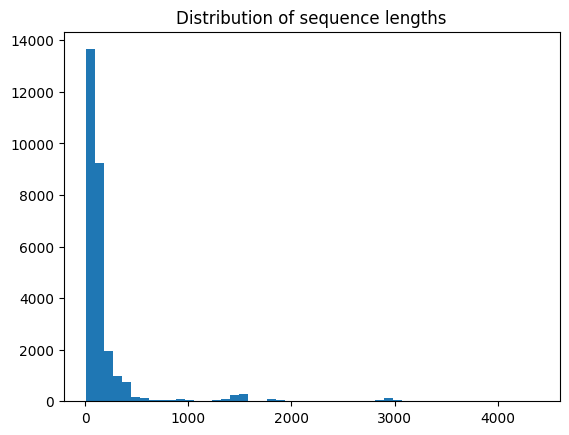

In [17]:
plt.hist(sequence_lengths,bins=50)
plt.title("Distribution of sequence lengths")
plt.show()